# Exercise 7 - Code

*Perform random failure simulations with a Barabási-Albert networks with 100 and 1000 nodes and two different numbers of preferentially attached edges and with the `protein.edgelist.txt` data set. Interprete briefly what you find for the breakdown threshold in both experiments.*

*Repeat this experiment for Erdös-Renyi networks but run the simulations 100 times and average over the resulting threshold values. What is your expectation for this value? Compare it to the numerical result.*

In [4]:
import networkx as nx
import numpy as np
import random
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)

path = "../data/"

In [36]:
def random_failure(G, m=1):
    N = len(G)
    if N % m == 0:
        n_steps = N // m - 1
    else:
        n_steps = N // m
    steps = np.arange(n_steps + 2)

    C = G.copy()
    proportions = np.zeros(n_steps + 2)
    fs = []
    proportions[0] = 1

    for step in steps[:-2]:
        C.remove_nodes_from(random.sample(list(C.nodes), m))
        core = max(nx.connected_components(C), key=len)
        proportions[step+1] = len(core) / N
        if len(list(nx.connected_components(C))) == len(C):
            fs.append(step / N)

    return steps/N, proportions, fs[0]

def average_next_nearest_degree(G):
    return np.sum(list(nx.average_neighbor_degree(G).values())) / len(G)

def f_c(G):
    return 1 - 1 / (average_next_nearest_degree(G) - 1)

In [37]:
Ns = [100, 1000]
Ms = [2, 10]
protein_network = nx.read_edgelist(path + "protein.edgelist.txt")

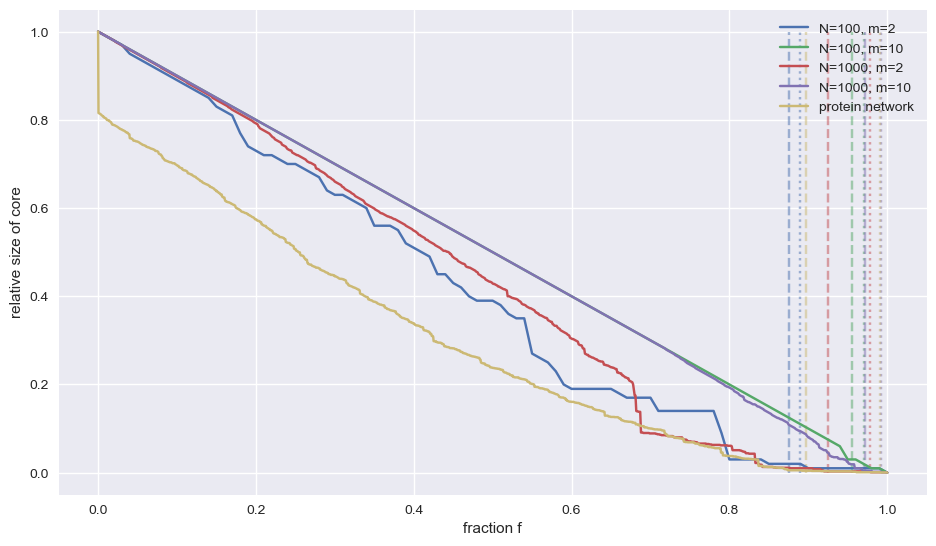

In [39]:
for i, N in enumerate(Ns):
    for j, m in enumerate(Ms):
        BA = nx.barabasi_albert_graph(N, m)
        fractions, proportions, f_b = random_failure(BA)
        plt.plot(fractions, proportions, label=f"N={N}, m={m}")
        plt.vlines(f_b, 0, 1, linestyle="dotted", color=f"C{2*i+j}", alpha=0.5)
        plt.vlines(f_c(BA), 0, 1, linestyle="dashed", color=f"C{2*i+j}", alpha=0.5)

fractions, proportions, f_b = random_failure(protein_network)
plt.plot(fractions, proportions, label="protein network")
plt.vlines(f_b, 0, 1, linestyle="dotted", color="C4", alpha=0.5)
plt.vlines(f_c(protein_network), 0, 1, linestyle="dashed", color="C4", alpha=0.5)

plt.ylabel("relative size of core")
plt.xlabel("fraction of nodes removed")
plt.legend()
plt.show()

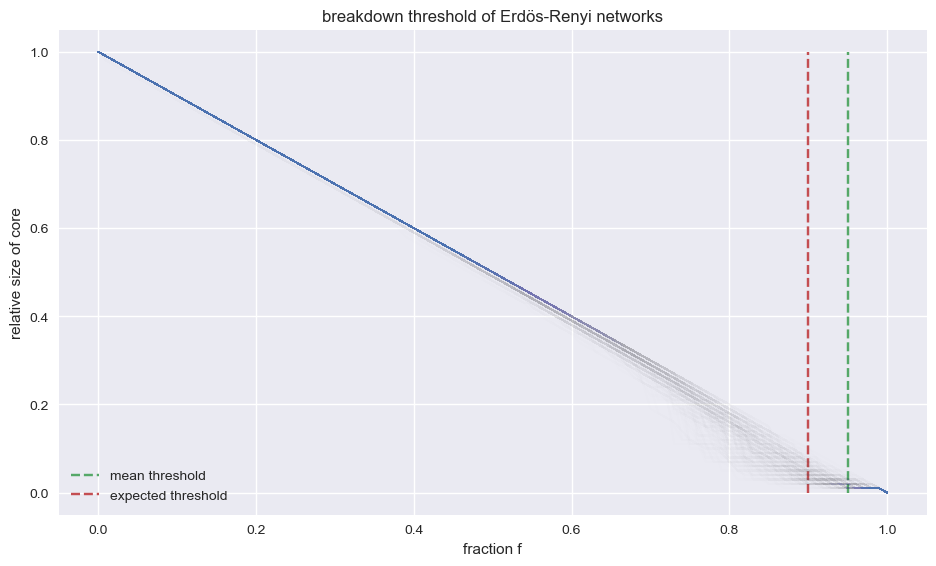

In [56]:
N = 100
p = 0.1
n = 200

vals = np.zeros(n)
for i in range(n):
    ER = nx.erdos_renyi_graph(N, p)
    fractions, sizes, vals[i] = random_failure(ER)
    plt.plot(fractions, sizes, color="C0", alpha=1/n)

f = np.mean(vals)
plt.vlines(f, 0, 1, linestyle="dashed", color="C1", label="mean threshold")

f_c = 1 - (N-1) / ((N-1)*N*p+1)
plt.vlines(f_c, 0, 1, linestyle="dashed", color="C2", label="expected threshold")

plt.title("breakdown threshold of Erdös-Renyi networks")
plt.ylabel("relative size of core")
plt.xlabel("fraction of nodes removed")
plt.legend(loc="lower left")
plt.show()
